In [ ]:
#Article https://developers.refinitiv.com/article/inflation-versus-dollar-cost-averaging-pension-fund-refinitiv

In [1]:
#Step 1:
#Import Python library
import pandas as pd
import eikon as ek

#Set app key and set display properties
ek.set_app_key('__YOUR_API_KEY__')
pd.set_option('display.max_rows', 14)
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
#Step 2:
#Overview on Thailand Consumer Price Index in the past 10+ years
CPIs_RIC = ['aTHCPI', #Thailand Consumer Price Index
            'aTHCPIBK', #Thailand Bangkok Price Index
            'aTHCPIFB', #Food and Non-Alcohol Price Index
            'aTHCPIHOSF/C', #Housing and Furnishing Price Index
            'aTHHPSDHHE/C', #Single House Price Index
            'aTHCPIPMCF/C'] #Personal and Medical Care Price Index
CPIs = ek.get_timeseries(CPIs_RIC,interval='yearly',start_date='2008-01-01',end_date='2020-03-03')
CPIs = CPIs.rename(columns={'aTHCPI': 'Thailand',
                    'aTHCPIBK': 'Bangkok',
                    'aTHCPIFB': 'Food & Non-Alcohol',
                    'aTHCPIHOSF/C': 'Housing and Furnishing',
                    'aTHHPSDHHE/C': 'Single-Detached House',
                    'aTHCPIPMCF/C':'Personal and Medical Care'})
CPIs

VALUE,Thailand,Bangkok,Food & Non-Alcohol,Housing and Furnishing,Single-Detached House,Personal and Medical Care
Date,,,,,,
2008-12-31,88.49,89.35,73.83,92.22,94.63,93.49
2009-12-31,87.74,88.36,77.08,90.65,99.44,94.63
2010-12-31,90.62,90.80,81.27,92.45,102.27,95.38
2011-12-31,94.08,94.14,87.75,93.66,106.37,96.17
2012-12-31,96.91,97.10,92.00,96.22,109.83,97.22
2013-12-31,99.03,99.05,95.13,98.03,118.47,98.07
2014-12-31,100.91,100.48,98.88,99.41,125.34,99.02
2015-12-31,100.00,100.00,100.00,100.00,128.29,99.99
2016-12-31,100.19,100.14,101.61,99.01,130.38,100.79


In [3]:
#Show percent change compare to previous year
#This is actually the inflation
CPIs = CPIs.pct_change()*100
CPIs.dropna(inplace=True)
CPIs

VALUE,Thailand,Bangkok,Food & Non-Alcohol,Housing and Furnishing,Single-Detached House,Personal and Medical Care
Date,,,,,,
2009-12-31,-0.85,-1.11,4.40,-1.70,5.08,1.22
2010-12-31,3.29,2.76,5.44,1.98,2.84,0.79
2011-12-31,3.81,3.67,7.96,1.31,4.01,0.83
2012-12-31,3.01,3.15,4.85,2.73,3.26,1.09
2013-12-31,2.18,2.01,3.41,1.88,7.86,0.87
2014-12-31,1.90,1.45,3.94,1.41,5.80,0.97
2015-12-31,-0.90,-0.48,1.13,0.59,2.35,0.98
2016-12-31,0.19,0.14,1.61,-0.99,1.62,0.80
2017-12-31,0.67,0.50,0.00,0.17,0.00,0.27


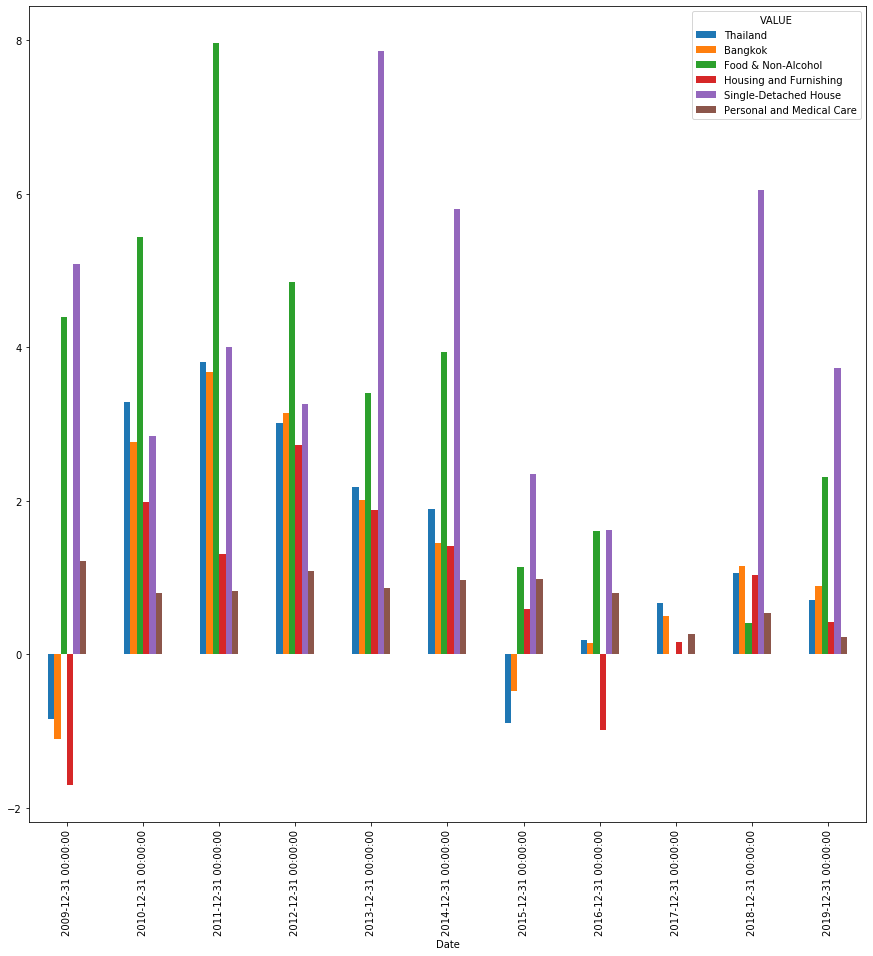

In [5]:
CPIs.plot.bar(figsize=(15,15))

In [6]:
#Step 3:
#Get Fund NAV from RIC
FundRIC = 'LP63500988'
df1, e = ek.get_data(FundRIC,['TR.FundNAV.date','TR.FundNAV'],{'SDate':'2008-01-01','EDate':'2020-03-03'})
df1

,Instrument,Date,NAV
0,LP63500988,2008-01-01T00:00:00Z,183.17
1,LP63500988,2008-01-02T00:00:00Z,181.55
2,LP63500988,2008-01-03T00:00:00Z,177.85
3,LP63500988,2008-01-04T00:00:00Z,181.56
4,LP63500988,2008-01-07T00:00:00Z,179.74
5,LP63500988,2008-01-08T00:00:00Z,178.50
6,LP63500988,2008-01-09T00:00:00Z,180.86
...,...,...,...
3169,LP63500988,2020-02-24T00:00:00Z,266.56
3170,LP63500988,2020-02-25T00:00:00Z,267.07


In [7]:
#Step 4:
#Define DCA contribution to your fund, please note that this is a random sample numbers
contributions = []
contributions.append([pd.Timestamp('2008-11-01'),100])
contributions.append([pd.Timestamp('2008-12-01'),100])
contributions.append([pd.Timestamp('2009-01-01'),100])
contributions.append([pd.Timestamp('2009-02-01'),100])
contributions.append([pd.Timestamp('2009-03-01'),100])
contributions.append([pd.Timestamp('2009-04-01'),100])
contributions.append([pd.Timestamp('2009-05-01'),100])
contributions.append([pd.Timestamp('2009-06-01'),100])
contributions.append([pd.Timestamp('2009-07-01'),100])
contributions.append([pd.Timestamp('2009-08-01'),100])
contributions.append([pd.Timestamp('2009-09-01'),100])
contributions.append([pd.Timestamp('2009-10-01'),100])
contributions.append([pd.Timestamp('2009-11-01'),113])
contributions.append([pd.Timestamp('2009-12-01'),113])
contributions.append([pd.Timestamp('2010-01-01'),113])
contributions.append([pd.Timestamp('2010-02-01'),113])
contributions.append([pd.Timestamp('2010-03-01'),113])
contributions.append([pd.Timestamp('2010-04-01'),116])
contributions.append([pd.Timestamp('2010-05-01'),116])
contributions.append([pd.Timestamp('2010-06-01'),116])
contributions.append([pd.Timestamp('2010-07-01'),116])
contributions.append([pd.Timestamp('2010-08-01'),116])
contributions.append([pd.Timestamp('2010-09-01'),116])
contributions.append([pd.Timestamp('2010-10-01'),116])
contributions.append([pd.Timestamp('2010-11-01'),116])
contributions.append([pd.Timestamp('2010-12-01'),116])
contributions.append([pd.Timestamp('2011-01-01'),116])
contributions.append([pd.Timestamp('2011-02-01'),116])
contributions.append([pd.Timestamp('2011-03-01'),116])
contributions.append([pd.Timestamp('2011-04-01'),120])
contributions.append([pd.Timestamp('2011-05-01'),120])
contributions.append([pd.Timestamp('2011-06-01'),120])
contributions.append([pd.Timestamp('2011-07-01'),120])
contributions.append([pd.Timestamp('2011-08-01'),120])
contributions.append([pd.Timestamp('2011-09-01'),120])
contributions.append([pd.Timestamp('2011-10-01'),120])
contributions.append([pd.Timestamp('2011-11-01'),120])
contributions.append([pd.Timestamp('2011-12-01'),120])
contributions.append([pd.Timestamp('2012-01-01'),120])
contributions.append([pd.Timestamp('2012-02-01'),120])
contributions.append([pd.Timestamp('2012-03-01'),120])
contributions.append([pd.Timestamp('2012-04-01'),125])
contributions.append([pd.Timestamp('2012-05-01'),125])
contributions.append([pd.Timestamp('2012-06-01'),125])
contributions.append([pd.Timestamp('2012-07-01'),125])
contributions.append([pd.Timestamp('2012-08-01'),125])
contributions.append([pd.Timestamp('2012-09-01'),125])
contributions.append([pd.Timestamp('2012-10-01'),125])
contributions.append([pd.Timestamp('2012-11-01'),125])
contributions.append([pd.Timestamp('2012-12-01'),125])
contributions.append([pd.Timestamp('2013-01-01'),125])
contributions.append([pd.Timestamp('2013-02-01'),125])
contributions.append([pd.Timestamp('2013-03-01'),125])
contributions.append([pd.Timestamp('2013-04-01'),131])
contributions.append([pd.Timestamp('2013-05-01'),131])
contributions.append([pd.Timestamp('2013-06-01'),131])
contributions.append([pd.Timestamp('2013-07-01'),162])
contributions.append([pd.Timestamp('2013-08-01'),146])
contributions.append([pd.Timestamp('2013-09-01'),146])
contributions.append([pd.Timestamp('2013-10-01'),146])
contributions.append([pd.Timestamp('2013-11-01'),146])
contributions.append([pd.Timestamp('2013-12-01'),146])
contributions.append([pd.Timestamp('2014-01-01'),146])
contributions.append([pd.Timestamp('2014-02-01'),146])
contributions.append([pd.Timestamp('2014-03-01'),146])
contributions.append([pd.Timestamp('2014-04-01'),146])
contributions.append([pd.Timestamp('2014-05-01'),146])
contributions.append([pd.Timestamp('2014-06-01'),146])
contributions.append([pd.Timestamp('2014-07-01'),155])
contributions.append([pd.Timestamp('2014-08-01'),155])
contributions.append([pd.Timestamp('2014-09-01'),155])
contributions.append([pd.Timestamp('2014-10-01'),155])
contributions.append([pd.Timestamp('2014-11-01'),155])
contributions.append([pd.Timestamp('2014-12-01'),155])
contributions.append([pd.Timestamp('2015-01-01'),155])
contributions.append([pd.Timestamp('2015-02-01'),155])
contributions.append([pd.Timestamp('2015-03-01'),155])
contributions.append([pd.Timestamp('2015-04-01'),160])
contributions.append([pd.Timestamp('2015-05-01'),160])
contributions.append([pd.Timestamp('2015-06-01'),160])
contributions.append([pd.Timestamp('2015-07-01'),160])
contributions.append([pd.Timestamp('2015-08-01'),160])
contributions.append([pd.Timestamp('2015-09-01'),160])
contributions.append([pd.Timestamp('2015-10-01'),160])
contributions.append([pd.Timestamp('2015-11-01'),160])
contributions.append([pd.Timestamp('2015-12-01'),160])
contributions.append([pd.Timestamp('2016-01-01'),160])
contributions.append([pd.Timestamp('2016-02-01'),160])
contributions.append([pd.Timestamp('2016-03-01'),160])
contributions.append([pd.Timestamp('2016-04-01'),166])
contributions.append([pd.Timestamp('2016-05-01'),166])
contributions.append([pd.Timestamp('2016-06-01'),166])
contributions.append([pd.Timestamp('2016-07-01'),166])
contributions.append([pd.Timestamp('2016-08-01'),166])
contributions.append([pd.Timestamp('2016-09-01'),166])
contributions.append([pd.Timestamp('2016-10-01'),166])
contributions.append([pd.Timestamp('2016-11-01'),166])
contributions.append([pd.Timestamp('2016-12-01'),166])
contributions.append([pd.Timestamp('2017-01-01'),166])
contributions.append([pd.Timestamp('2017-02-01'),166])
contributions.append([pd.Timestamp('2017-03-01'),166])
contributions.append([pd.Timestamp('2017-04-01'),172])
contributions.append([pd.Timestamp('2017-05-01'),172])
contributions.append([pd.Timestamp('2017-06-01'),172])
contributions.append([pd.Timestamp('2017-07-01'),172])
contributions.append([pd.Timestamp('2017-08-01'),172])
contributions.append([pd.Timestamp('2017-09-01'),172])
contributions.append([pd.Timestamp('2017-10-01'),172])
contributions.append([pd.Timestamp('2017-11-01'),172])
contributions.append([pd.Timestamp('2017-12-01'),172])
contributions.append([pd.Timestamp('2018-01-01'),172])
contributions.append([pd.Timestamp('2018-02-01'),172])
contributions.append([pd.Timestamp('2018-03-01'),172])
contributions.append([pd.Timestamp('2018-04-01'),179])
contributions.append([pd.Timestamp('2018-05-01'),179])
contributions.append([pd.Timestamp('2018-06-01'),179])
contributions.append([pd.Timestamp('2018-07-01'),179])
contributions.append([pd.Timestamp('2018-08-01'),179])
contributions.append([pd.Timestamp('2018-09-01'),179])
contributions.append([pd.Timestamp('2018-10-01'),179])
contributions.append([pd.Timestamp('2018-11-01'),179])
contributions.append([pd.Timestamp('2018-12-01'),179])
contributions.append([pd.Timestamp('2019-01-01'),179])
contributions.append([pd.Timestamp('2019-02-01'),179])
contributions.append([pd.Timestamp('2019-03-01'),179])
contributions.append([pd.Timestamp('2019-04-01'),189])
contributions.append([pd.Timestamp('2019-05-01'),189])
contributions.append([pd.Timestamp('2019-06-01'),189])
contributions.append([pd.Timestamp('2019-07-01'),189])
contributions.append([pd.Timestamp('2019-08-01'),189])
contributions.append([pd.Timestamp('2019-09-01'),189])
contributions.append([pd.Timestamp('2019-10-01'),189])
contributions.append([pd.Timestamp('2019-11-01'),189])
contributions.append([pd.Timestamp('2019-12-01'),189])
contributions.append([pd.Timestamp('2020-01-01'),189])

In [8]:
#Step 5:
#Add Amount Invested column and set its value to 0
df1['AmountInvested'] = 0.0

#Convert Date column from object to datetime64
df1['Date'] =  pd.to_datetime(df1['Date'], infer_datetime_format=True)

#Loop through contributions and add Amount Invested to dataframe
#If the NAV of the date contributed could not be found, add 1 day until NAV is found
for contribution in contributions:
    searchingDay = contribution[0]
    while (len(df1.loc[df1['Date'] == searchingDay, 'AmountInvested'])==0):
        searchingDay += pd.DateOffset(1)
    df1.loc[df1['Date'] == searchingDay, 'AmountInvested'] = contribution[1]

#Drop any row without contribution from dataframe
df1 = df1[df1["AmountInvested"] > 0]
df1 = df1.reset_index(drop=True)

df1

,Instrument,Date,NAV,AmountInvested
0,LP63500988,2008-11-03,101.90,100.00
1,LP63500988,2008-12-01,97.81,100.00
2,LP63500988,2009-01-01,100.11,100.00
3,LP63500988,2009-02-02,94.33,100.00
4,LP63500988,2009-03-02,87.66,100.00
5,LP63500988,2009-04-01,96.39,100.00
6,LP63500988,2009-05-01,111.28,100.00
...,...,...,...,...
128,LP63500988,2019-07-01,266.82,189.00
129,LP63500988,2019-08-01,261.08,189.00


In [9]:
#Step 6:
#Add Total Amount Invested column and set its value to cumulative summation of Amount Invested
df1['TotalAmountInvested'] = df1['AmountInvested'].cumsum()

#Add Unit Invested column and set its value to Amount Invested / NAV
df1['UnitInvested'] = df1['AmountInvested']/df1['NAV']

#Add Total Unit Invested column and set its value to cumulative summation of Unit Invested
df1['TotalUnitInvested'] = df1['UnitInvested'].cumsum()

#Add Total Value column and set its value to Total Unit Invested * NAV
df1['TotalValue'] = df1['NAV']*df1['TotalUnitInvested']

#Add Absolute Gain or Loss and set its value to Total Value - Total Amount Invested
df1['Gain/Loss'] = df1['TotalValue']-df1['TotalAmountInvested']
df1

,Instrument,Date,NAV,AmountInvested,TotalAmountInvested,UnitInvested,TotalUnitInvested,TotalValue,Gain/Loss
0,LP63500988,2008-11-03,101.90,100.00,100.00,0.98,0.98,100.00,0.00
1,LP63500988,2008-12-01,97.81,100.00,200.00,1.02,2.00,195.99,-4.01
2,LP63500988,2009-01-01,100.11,100.00,300.00,1.00,3.00,300.59,0.59
3,LP63500988,2009-02-02,94.33,100.00,400.00,1.06,4.06,383.24,-16.76
4,LP63500988,2009-03-02,87.66,100.00,500.00,1.14,5.20,456.14,-43.86
5,LP63500988,2009-04-01,96.39,100.00,600.00,1.04,6.24,601.57,1.57
6,LP63500988,2009-05-01,111.28,100.00,700.00,0.90,7.14,794.50,94.50
...,...,...,...,...,...,...,...,...,...
128,LP63500988,2019-07-01,266.82,189.00,"18,533.00",0.71,99.31,"26,498.61","7,965.61"
129,LP63500988,2019-08-01,261.08,189.00,"18,722.00",0.72,100.04,"26,117.56","7,395.56"


In [10]:
#Step 7:
#Get current NAV and calculate Total Unit Invested, Total Value and Absolute Gain/Loss
df2, e = ek.get_data(FundRIC,['TR.FundNAV.date','TR.FundNAV'])
df2['Date'] =  pd.to_datetime(df2['Date'], infer_datetime_format=True)
df2["AmountInvested"] = 0
df2["TotalAmountInvested"] = df1.tail(1)["TotalAmountInvested"].values[0]
df2["UnitInvested"] = 0
df2["TotalUnitInvested"] = df1.tail(1)["TotalUnitInvested"].values[0]
df2['TotalValue'] = df2['NAV']*df2['TotalUnitInvested']
df2['Gain/Loss'] = df2['TotalValue']-df2['TotalAmountInvested']
df2

,Instrument,Date,NAV,AmountInvested,TotalAmountInvested,UnitInvested,TotalUnitInvested,TotalValue,Gain/Loss
0,LP63500988,2020-03-05,262.70,0,"19,667.00",0,103.69,"27,239.74","7,572.74"


In [11]:
#Append df2 to df1
df1 = df1.append(df2, ignore_index = True) 
df1

,Instrument,Date,NAV,AmountInvested,TotalAmountInvested,UnitInvested,TotalUnitInvested,TotalValue,Gain/Loss
0,LP63500988,2008-11-03,101.90,100.00,100.00,0.98,0.98,100.00,0.00
1,LP63500988,2008-12-01,97.81,100.00,200.00,1.02,2.00,195.99,-4.01
2,LP63500988,2009-01-01,100.11,100.00,300.00,1.00,3.00,300.59,0.59
3,LP63500988,2009-02-02,94.33,100.00,400.00,1.06,4.06,383.24,-16.76
4,LP63500988,2009-03-02,87.66,100.00,500.00,1.14,5.20,456.14,-43.86
5,LP63500988,2009-04-01,96.39,100.00,600.00,1.04,6.24,601.57,1.57
6,LP63500988,2009-05-01,111.28,100.00,700.00,0.90,7.14,794.50,94.50
...,...,...,...,...,...,...,...,...,...
129,LP63500988,2019-08-01,261.08,189.00,"18,722.00",0.72,100.04,"26,117.56","7,395.56"
130,LP63500988,2019-09-02,249.11,189.00,"18,911.00",0.76,100.80,"25,109.12","6,198.12"


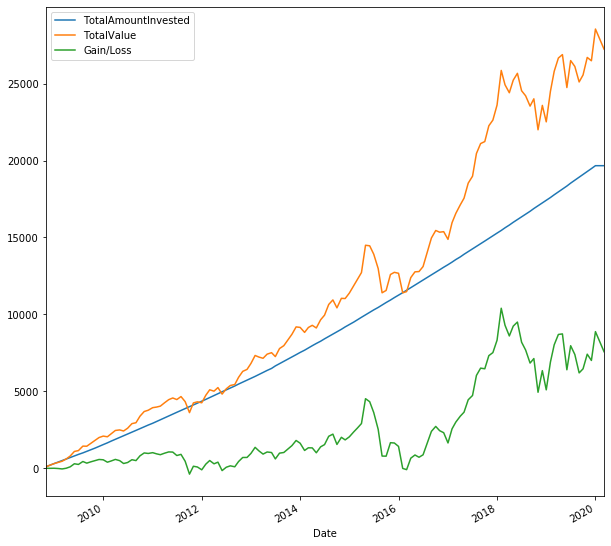

In [12]:
df1.plot(x='Date', y=['TotalAmountInvested','TotalValue','Gain/Loss'],figsize=(10,10))

In [13]:
#Step 8:
#Define xirr function
#https://stackoverflow.com/questions/8919718/financial-python-library-that-has-xirr-and-xnpv-function
def xirr(transactions):
    years = [(ta[0] - transactions[0][0]).days / 365.0 for ta in transactions]
    residual = 1
    step = 0.05
    guess = 0.05
    epsilon = 0.0001
    limit = 10000
    while abs(residual) > epsilon and limit > 0:
        limit -= 1
        residual = 0.0
        for i, ta in enumerate(transactions):
            residual += ta[1] / pow(guess, years[i])
        if abs(residual) > epsilon:
            if residual > 0:
                guess += step
            else:
                guess -= step
                step /= 2.0
    return guess-1

#Uncomment this code to test xirr function
#tas = []
#tas.append([pd.Timestamp(2008,1,1),-100])
#tas.append([pd.Timestamp(2009,1,1),-100])
#tas.append([pd.Timestamp(2010,1,1),230])
#print(xirr(tas)*100)

In [14]:
#Step 9:
#Extract data from Dataframe and prepare it for xirr function

#For xirr function, invested money is negative
df1['AmountInvested'] = df1['AmountInvested']*-1
#Get Date and amount
tas = df1[['Date','AmountInvested']].values.tolist()
#The current date(last row) value is a positive number and it is the Total Value
tas[-1][1] = df1.tail(1)["TotalValue"].values[0]

In [15]:
AverageReturn = xirr(tas) * 100
print("%.2f" % AverageReturn)

6.15


In [16]:
#Step 10:
#Add Average Return to the dataframe
CPIs['Return'] = AverageReturn
CPIs

VALUE,Thailand,Bangkok,Food & Non-Alcohol,Housing and Furnishing,Single-Detached House,Personal and Medical Care,Return
Date,,,,,,,
2009-12-31,-0.85,-1.11,4.40,-1.70,5.08,1.22,6.15
2010-12-31,3.29,2.76,5.44,1.98,2.84,0.79,6.15
2011-12-31,3.81,3.67,7.96,1.31,4.01,0.83,6.15
2012-12-31,3.01,3.15,4.85,2.73,3.26,1.09,6.15
2013-12-31,2.18,2.01,3.41,1.88,7.86,0.87,6.15
2014-12-31,1.90,1.45,3.94,1.41,5.80,0.97,6.15
2015-12-31,-0.90,-0.48,1.13,0.59,2.35,0.98,6.15
2016-12-31,0.19,0.14,1.61,-0.99,1.62,0.80,6.15
2017-12-31,0.67,0.50,0.00,0.17,0.00,0.27,6.15


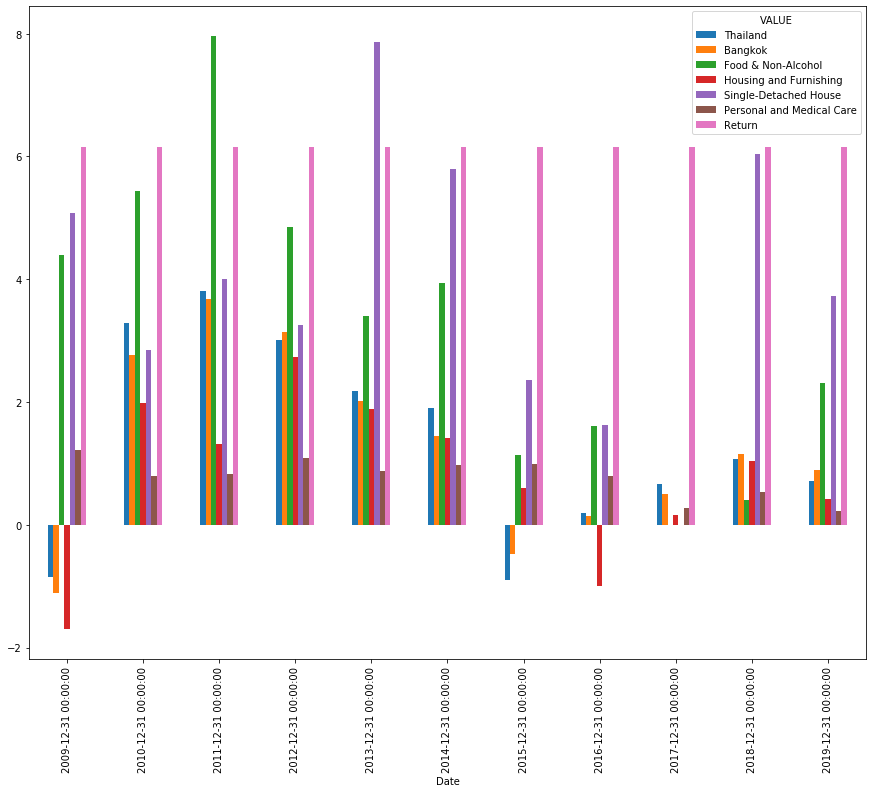

In [17]:
#Plot Bar Chart to compare inflation and average return
CPIs.plot.bar(figsize=(15,12))